In [1]:
## Import required libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

In [2]:
## Store data, labels in the list
data = []
labels = []

In [3]:
# We have 43 Classes
classes = 43
cur_path = os.getcwd()

In [4]:
## Preprocess the images
for i in range(classes):
    path = os.path.join(cur_path, 'train', str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(os.path.join(path, a))
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except Exception as e:
            print(e)


In [5]:

## Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)

In [6]:
## Save Labels & Data for future use
if not os.path.exists('./training'):
    os.mkdir('./training')

np.save('./training/data', data)
np.save('./training/target', labels)


In [7]:
## Load data & Labels
data = np.load('./training/data.npy')
labels = np.load('./training/target.npy')
print(data.shape, labels.shape)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [8]:
## Convert labels to one-hot encoding
y_train = to_categorical(y_train, classes)
y_test = to_categorical(y_test, classes)


In [9]:
## Build the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(classes, activation='softmax'))

C:\Users\Adwai Surve\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
## Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


Epoch 1/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.2585 - loss: 3.5562 - val_accuracy: 0.8068 - val_loss: 0.7935
Epoch 2/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7135 - loss: 0.9711 - val_accuracy: 0.9129 - val_loss: 0.3309
Epoch 3/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8218 - loss: 0.5935 - val_accuracy: 0.9503 - val_loss: 0.1951
Epoch 4/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8663 - loss: 0.4710 - val_accuracy: 0.9505 - val_loss: 0.1677
Epoch 5/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8982 - loss: 0.3482 - val_accuracy: 0.9572 - val_loss: 0.1490
Epoch 6/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9045 - loss: 0.3316 - val_accuracy: 0.9653 - val_loss: 0.1175
Epoch 7/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9157 - loss: 0.2996 - val_accuracy: 0.9758 - val_loss: 0.0858
Epoch 8/20
981/981 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9270 - loss: 0.2628 - val_accuracy: 0

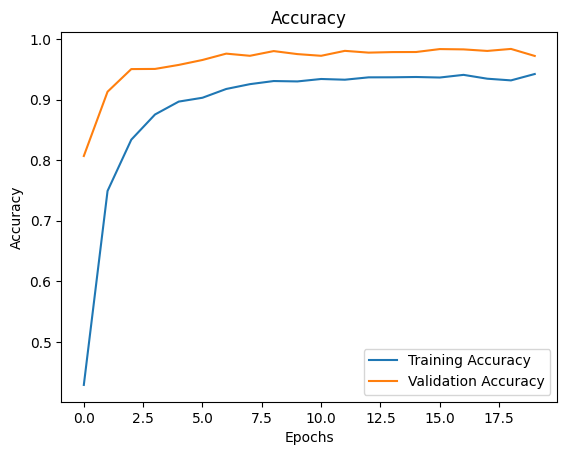

In [11]:
## Train the model
epochs = 20
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))

## Plot Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



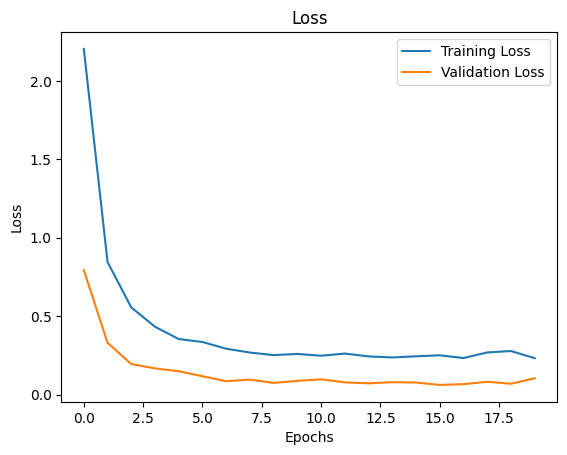

In [12]:
## Plot Loss
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [13]:
## Test on Test Data
def testing(testcsv):
    y_test = pd.read_csv(testcsv)
    labels = y_test["ClassId"].values
    imgs = y_test["Path"].values
    data = []
    for img in imgs:
        image = Image.open(img)
        image = image.resize((30, 30))
        data.append(np.array(image))
    X_test = np.array(data)
    return X_test, labels

X_test, labels = testing('Test.csv')
Y_pred_prob = model.predict(X_test)
Y_pred = np.argmax(Y_pred_prob, axis=1)
print("Accuracy on test data:", accuracy_score(labels, Y_pred))


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Accuracy on test data: 0.9251781472684085


In [14]:
## Save the model
model.save("./training/TSR.h5")

In [15]:
## Load the Model
model = load_model('./training/TSR.h5')

In [16]:
## Classes of traffic signs
classes = {0: 'Speed limit (20km/h)', 1: 'Speed limit (30km/h)', 2: 'Speed limit (50km/h)', 3: 'Speed limit (60km/h)', 
           4: 'Speed limit (70km/h)', 5: 'Speed limit (80km/h)', 6: 'End of speed limit (80km/h)', 7: 'Speed limit (100km/h)', 
           8: 'Speed limit (120km/h)', 9: 'No passing', 10: 'No passing veh over 3.5 tons', 11: 'Right-of-way at intersection', 
           12: 'Priority road', 13: 'Yield', 14: 'Stop', 15: 'No vehicles', 16: 'Veh > 3.5 tons prohibited', 17: 'No entry', 
           18: 'General caution', 19: 'Dangerous curve left', 20: 'Dangerous curve right', 21: 'Double curve', 22: 'Bumpy road', 
           23: 'Slippery road', 24: 'Road narrows on the right', 25: 'Road work', 26: 'Traffic signals', 27: 'Pedestrians', 
           28: 'Children crossing', 29: 'Bicycles crossing', 30: 'Beware of ice/snow', 31: 'Wild animals crossing', 
           32: 'End speed + passing limits', 33: 'Turn right ahead', 34: 'Turn left ahead', 35: 'Ahead only', 
           36: 'Go straight or right', 37: 'Go straight or left', 38: 'Keep right', 39: 'Keep left', 
           40: 'Roundabout mandatory', 41: 'End of no passing', 42: 'End no passing veh > 3.5 tons'}


In [17]:
## Function to test on a single image
def test_on_img(img_path):
    image = Image.open(img_path)
    image = image.resize((30, 30))
    data = np.array(image).reshape(1, 30, 30, 3)
    Y_pred_prob = model.predict(data)
    Y_pred = np.argmax(Y_pred_prob, axis=1)
    return image, Y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
Predicted traffic sign is: Speed limit (50km/h)


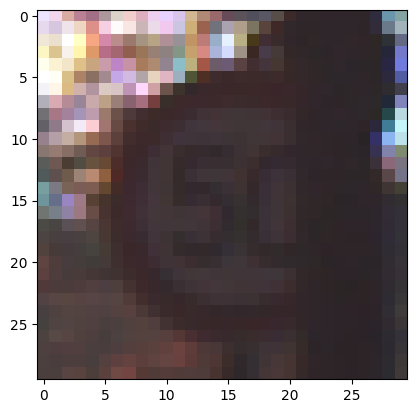

In [18]:
img_path = r'D:\Traffic_Sign_Recognition\Test\00600.png'
plot, prediction = test_on_img(img_path)
class_label = int(prediction[0])
print("Predicted traffic sign is:", classes[class_label])
plt.imshow(plot)
plt.show()
##D:\Traffic_Sign_Recognition\Train\5\00005_00003_00001.png